<H1> Conditional Probability </H1>

<P>It is the probability of an event given that another event has occurred. The probability of an event R given C is defined as:</P>

$P(C|R) = \frac{P(C \cap R)}{P(R)}, $
<P> where  $P(C \cap R)$ is the probability of both $C$ and $R$ ocurring</P>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# conf is a dictionay with the recording configurations
conf ={
    'pairs':      495., 
    'triplets':    96.,
    'quadruples': 135.,
    'quintuples': 120.,
    'sextuples':  118.,
    'septuples':   66.,
    'octuples':    72.
}

# syn is a dictionary with the number of connections found
syn ={
    'pairs':      4., 
    'triplets':   6.,
    'quadruples': 18.,
    'quintuples': 27.,
    'sextuples':  39.,
    'septuples':  25.,
    'octuples':   27.
}

In [3]:
# Remember, the number of recording configurations
# is NOT the same as the number of connections tested
nconf = np.sum( conf.values() )
nsyn = np.sum( syn.values() )
print('Total recording configurations = %4d'%nconf)
print('Total connections              = %4d'%nsyn)

Total recording configurations = 1102
Total connections              =  146


We will compute P(C|R), where C is "connection" and R is "recording configuration". For example, the probability of getting a connection in a pair configuration is just the percentage of how many connections were found in the total number of pair configurations.

In [4]:
PCR = syn['pairs'] /conf['pairs']
print "P(connection | pairs): ", PCR

P(connection | pairs):  0.00808080808081


P(R) is just the probability of 'pair' configuration in this data set:

In [5]:
PR = conf['pairs'] / nconf
print "P(pairs): ", PR

P(pairs):  0.449183303085


And P(C) is the overall probability of finding a connection in a recording type, regardless of the recording configuration:

In [6]:
PC = nsyn/nconf
print "P(connection): ", PC

P(connection):  0.132486388385


If number of connections (C) and recording configuration (R) were independent, then we would expect P(C | R) to be about the same as P(C), but they're not; P(C) is 0.132, and P(C|R) is 0.008. This tells us that conections (C) and recording configuratons (R) are dependent.

P(C U R) is different from P(C|R). P(C U R) would be the probability of both recording in a pair configuration
and getting a connection, out of the total population - not just the population of recording with pairs 

In [7]:
PCUR = syn['pairs']/nconf
print "P(connection U pair): ", PCUR

P(connection U pair):  0.00362976406534


In [8]:
PC*PR

0.059510673548506102

P(C U R) and P(C)P(R) are pretty different  because R and C are actually dependent on each other.

We can also check that P(C|R) = P(C U R)/P(R) and sure enough, it is:

In [9]:
PCUR/PR # P(C|R)

0.0080808080808080808

<H2>Conditional probability of every recording configuration</H2>

In [10]:
print( "P(connection): %2.4f"%PC)
print( "==================================")

prob = list()
#for config in conf.keys():
myconfig = ['pairs', 'triplets', 'quadruples', 'quintuples', 'sextuples', 'septuples', 'octuples']    
for config in myconfig:
    PCR = syn[config] /conf[config]
    print( "P(connection | %-10s): %2.4f"%(config,PCR) )
    prob.append(PCR)
    
print( "==================================")

P(connection): 0.1325
P(connection | pairs     ): 0.0081
P(connection | triplets  ): 0.0625
P(connection | quadruples): 0.1333
P(connection | quintuples): 0.2250
P(connection | sextuples ): 0.3305
P(connection | septuples ): 0.3788
P(connection | octuples  ): 0.3750


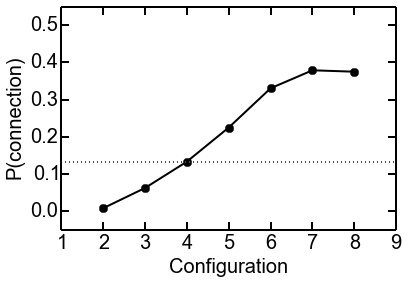

In [11]:
plt.plot(range(2,9),prob, 'ko-')
plt.axhline(0.1325, color='red', linestyle=':')
plt.xlim(1, 9), plt.ylim(-0.05,.55)
plt.xlabel('Configuration'), plt.ylabel('P(connection)');

It is then clear that recording configuration affects the probability of finding a connection.This is without affect the average conection probability (i.e. the number of connections divided by the number or tested connections). In concrete, with five or more electrodes (quintuples, sextuples, septuples and octuples) is above the average probability (in red). 